blue


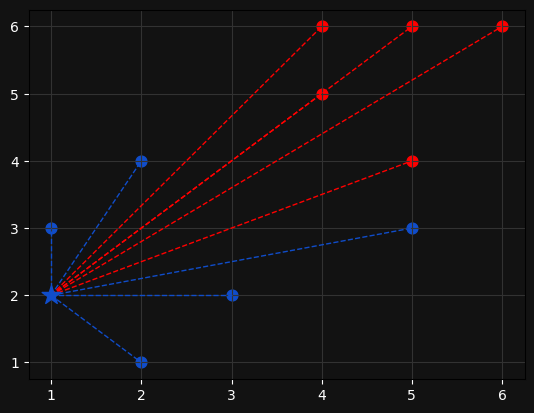

In [10]:
import numpy as np
from collections import Counter

points = {
    "blue": [[2,4],[1,3],[5,3],[3,2],[2,1]],
    "red":  [[5,6],[4,5],[4,6],[6,6],[5,4]]
}

new_point = [1,2]

def euclidean_distance(p, q):
    return np.sqrt(np.sum((np.array(p) - np.array(q)) ** 2))

class KNearestNeighbours:

    def __init__(self, k=3):
        self.k = k

    def fit(self, points):
        self.points = points

    def predict(self, new_point):
        distances = []

        for category in self.points:
            for point in self.points[category]:
                distance = euclidean_distance(point, new_point)
                distances.append((distance, category))

        distances.sort(key=lambda x: x[0])
        categories = [category for _, category in distances[:self.k]]

        result = Counter(categories).most_common(1)[0][0]
        return result

clf = KNearestNeighbours(k=3)
clf.fit(points)
print(clf.predict(new_point))

import matplotlib.pyplot as plt

ax = plt.subplot()
ax.grid(True, color="#323232")
ax.figure.set_facecolor("#121212")
ax.set_facecolor("#121212")

ax.tick_params(axis="x", colors="white")
ax.tick_params(axis="y", colors="white")


for point in points['blue']:
    ax.scatter(point[0], point[1], color="#104DCA", s=60)


for point in points['red']:
    ax.scatter(point[0], point[1], color="#FF0000", s=60)

new_class = clf.predict([new_point])[0]
color = "#FF0000" if new_class == "red" else "#104DCA"

ax.scatter(new_point[0], new_point[1],
           color=color, marker="*", s=200, zorder=100)

for point in points['blue']:
    ax.plot([new_point[0], point[0]],
            [new_point[1], point[1]],
            color="#104DCA", linestyle="--", linewidth=1)

for point in points['red']:
    ax.plot([new_point[0], point[0]],
            [new_point[1], point[1]],
            color="#FF0000", linestyle="--", linewidth=1)

plt.show()


         